# LISTA 6

In [2721]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import pandas as pd
from typing import Callable, Tuple, List

In [2722]:
def interpol_newton(x: float, xdata: np.ndarray, ydata: np.ndarray) -> float:
    n = len(xdata)

    fxx = np.copy(ydata)
    omega = 1.0
    result = fxx[0]
    for k in range(n-1):
        for i in range(n - k - 1):
            fxx[i] = (fxx[i + 1] - fxx[i]) / (xdata[i + k + 1] - xdata[i])
        
        omega *= (x - xdata[k])
        result += fxx[0] * omega 

    return result

### ZADANIE 1

<img src="z1.png" alt="zadanie1" width="550"/>

#### Całkowanie numeryczne - metoda trapezów:
$$I = \sum_{i=0}^{n-1} I_i = \dfrac{h}{2} \sum_{i=0}^{n-1} [f(x_i)+f(x_{i+1})]$$

gdzie: $\quad h = \dfrac{b-a}{n}$

In [2723]:
m_ex1 = 2000
v_start_ex1 = 1
v_end_ex1 = 6

v_ex1 = np.array([0, 1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0])  #[m/s]
P_ex1 = np.array([0, 4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2]) * 10**3 #[W]

In [2724]:
def dt_dv(v: float) -> float:
    return m_ex1 * v / interpol_newton(v, v_ex1, P_ex1)

In [2725]:
def trapez_integration(func: Callable[[float], float], a: float, b: float, n: int) -> float:
    h = (b - a) / n 
    x = np.linspace(a, b, n+1)
    y = func(x)        
    result = 0
    for i in range(n):
        result += y[i] + y[i+1]
    result = result * h/2
    return result

In [2726]:
def trapez_integration_v2(func: Callable[[float], float], a: float, b: float, n: int) -> float:
    h = (b - a) / n 
    x = np.linspace(a, b, n+1)
    y = func(x)        
    result = np.sum(y[:-1] + y[1:]) * h/2
    return result

In [2727]:
n_ex1 = 40
delta_t = trapez_integration(dt_dv, v_start_ex1, v_end_ex1, n_ex1)
delta_t

np.float64(1.278966661664824)

In [2728]:
# wbudowana
x_delta = np.linspace(v_start_ex1, v_end_ex1, 100)
y_delta = dt_dv(x_delta)
delta_scipy = scipy.integrate.trapezoid(y_delta, x_delta)
delta_scipy

np.float64(1.2785768413713878)

### ZADANIE 2

<img src="z2.png" alt="zadanie2" width="550"/>

$\cos(2\cos^{-1}x) = \cos(\cos^{-1}x)^2 - \sin(\cos^{-1}x)^2 = \ldots = 2x^2 - 1$

#### Całkowanie numeryczne - metoda Simpsona:
$$S(f) = \sum_{i=0}^{\frac{n}{2}-1} S_{2i}(f) = \dfrac{h}{3} \sum_{i=0}^{\frac{n}{2}-1} [f_{2i}+4f_{2i+1}+f_{2i+2}] =  \dfrac{h}{3} \sum_{i=0}^{\frac{n}{2}-1} [f_{0}+ f_n+ 2(f_2+f_4+\ldots+f_{n-2})+4(f_1+f_3+\ldots+f_{n-1})]$$

gdzie: $\quad h = \dfrac{b-a}{n}$, $\quad n - \textbf{parzyste !}$

In [2729]:
def func_ex2(x: float) -> float:
    return np.cos(2*(np.arccos(x)))

In [2730]:
def func_ex2_v2(x: float) -> float:
    return 2*x**2-1

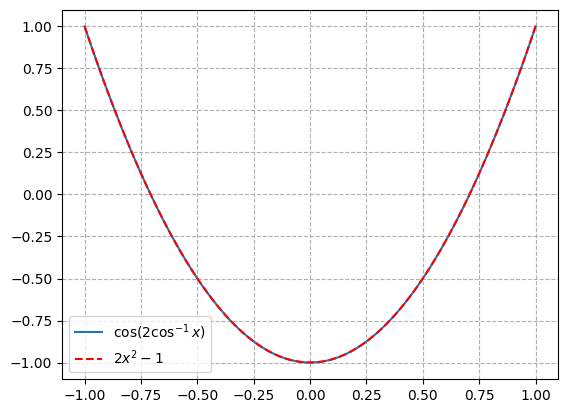

In [2731]:
x_ex2 = np.linspace(-1,1,100)
y_ex2 = func_ex2(x_ex2)
y_ex2_v2 = func_ex2_v2(x_ex2)

plt.plot(x_ex2, y_ex2, label = '$\\cos(2\\cos^{-1}x)$')
plt.plot(x_ex2, y_ex2_v2, color = 'red', linestyle = '--', label = '$2x^2-1$')
plt.grid(True, linestyle='--')
plt.legend()

plt.show()

#### Dokładność wzoru Simpsona zależy od tego, jak dobrze funkcja pasuje do parabolicznej aproksymacji. 

In [2732]:
def simp_intergration(func: Callable[[float], float], a: float, b: float, n: int) -> float:
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = func(x)
    result = 0
    if n%2 != 0:
        raise ValueError('n musi być parzyste !')
    k = n//2
    for i in range(k):
        result += y[2*i]+4*y[2*i+1]+y[2*i+2]
    result *= h/3
    return result

In [2733]:
def simp_intergration_v0(func: Callable[[float], float], a: float, b: float, n: int) -> float:
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = func(x)
    if n%2 != 0:
        raise ValueError('n musi być parzyste !')
    result = h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return result

In [2734]:
# węzły=3
simp_intergration(func = func_ex2, a=-1, b=1, n=2)

np.float64(-0.6666666666666666)

In [2735]:
# węzły=5
simp_intergration(func = func_ex2, a=-1, b=1, n=4)

np.float64(-0.6666666666666665)

In [2736]:
# węzły=7
simp_intergration(func = func_ex2, a=-1, b=1, n=6)

np.float64(-0.6666666666666667)

In [2737]:
# # wbudowana

# x_vals_3 = np.linspace(-1, 1, 2)
# x_vals_5 = np.linspace(-1, 1, 4)
# x_vals_7 = np.linspace(-1, 1, 6)

# I_3_scipy = scipy.integrate.simpson(func_ex2(x_vals_3), x=x_vals_3)
# I_5_scipy = scipy.integrate.simpson(func_ex2(x_vals_5), x=x_vals_5)
# I_7_scipy = scipy.integrate.simpson(func_ex2(x_vals_7), x=x_vals_7)

# I_5_scipy, I_7_scipy

### ZADANIE 3

<img src="z3.png" alt="zadanie3" width="550"/>

$$\int_1^ \infty (1+x^4)^{-1} = \left| x^3 = t\right| = \int_{1}^{0} \left(1+\left(\frac{1}{t}\right)^{4/3}\right)^{-1} \cdot \dfrac{-1}{3t^{4/3}} = -\dfrac{1}{3}\int_{1}^{0} \left(t^{4/3} +1\right)^{-1} = \dfrac{1}{3}\int_{0}^{1} \left(t^{4/3} +1\right)^{-1}$$

In [2738]:
def func_ex3(x: float) -> float:
    return (1+x**4)**(-1)

In [2739]:
def func_ex3_v2(t: float) -> float:
    return 1 / (3*(1+ t**(4/3)))

In [2740]:
trapez_integration(func_ex3_v2, a=0, b=1, n=5)

np.float64(0.24369830404429732)

In [2741]:
# wbudowana
x_ex3_scipy = np.linspace(0, 1, 6)
y_ex3_scipy = func_ex3_v2(x_ex3_scipy)
I_ex3= scipy.integrate.trapezoid(y_ex3_scipy, x_ex3_scipy)
I_ex3

np.float64(0.24369830404429735)

### ZADANIE 4

<img src="z4.png" alt="zadanie4" width="550"/>

In [2742]:
def func_T(L, h):
    g = 9.81
    return 4*np.sqrt(L/g)*h

In [2743]:
def func_ex4(theta: float, theta0: int) -> float:
    return 1 / np.sqrt(1 - np.sin(theta0 / 2)**2 * np.sin(theta)**2)

In [2744]:
def trapez_integration_v2(func: Callable[[float, int], float], theta0: int, a: float, b: float, n: int = 9) -> float:
    h = (b - a) / n 
    x = np.linspace(a, b, n+1)
    y = func(x, theta0)        
    result = 0
    for i in range(n):
        result += y[i] + y[i+1]
    result = result * h/2
    return result

In [2745]:
h15 = trapez_integration_v2(func_ex4, theta0= 15*np.pi/180, a=0, b=np.pi/2)
h30 = trapez_integration_v2(func_ex4, theta0 = 30*np.pi/180, a=0, b=np.pi/2)
h45 = trapez_integration_v2(func_ex4, theta0=45*np.pi/180, a=0, b=np.pi/2)
h0 = trapez_integration_v2(func_ex4, theta0=0*np.pi/180, a=0, b=np.pi/2)

In [2746]:
func_T(10, h0)

np.float64(6.343739849219413)

In [2747]:
func_T(10, h15)

np.float64(6.371021604696848)

In [2748]:
func_T(10, h30)

np.float64(6.454176732255873)

In [2749]:
print('h(0):', h0)
print('h(15):', h15)
print('h(30):', h30)
print('h(45):', h45)

h(0): 1.5707963267948966
h(15): 1.5775516607636664
h(30): 1.5981420021125399
h(45): 1.6335863074581478


In [2750]:
np.pi/2

1.5707963267948966

### ZADANIE 5

<img src="z5.png" alt="zadanie5" width="550"/>

#### Wielomian Legendre'a:

$ P_{n+1}(x) = \dfrac{2n+1}{n+1} x P_n(x) - \dfrac{n}{n+1} P_{n-1}(x), \quad \text{gdzie} \quad P_0 = 1, \quad P_1 = x$

$ \dfrac{d}{dx} P_{n+1}(x) = \dfrac{n}{x^2-1} \left(x P_n(x) - P_{n-1}(x)\right)$

#### Kwadratura Gaussa-Legendre'a:
$ A_i = \dfrac{2}{(1-x_i^2)[P^\prime_{n+1}(x_i)]^2} $


#### Zmianiamy zakres $(a,b)$, na zakres "standardowy" $(-1,1)$:
$x = \dfrac{b+a}{2} + \dfrac{b-a}{2} \xi \quad \Rightarrow \quad dx = \dfrac{b-a}{2} d\xi$

#### Ostatecznie:
$$ \int_a^b f(x) dx = \dfrac{b-a}{2} \sum _{i=1}^n A_i f(x_i) $$

In [2751]:
def func_ex5(x: float) -> float:
    return np.log(x) / (x**2-2*x+2)

In [2752]:
def wiel_legendre(x: float, n: int) -> Tuple[float, float]:
    p = np.zeros(n + 1)
    p[0], p[1] = 1, x 
    for i in range(2, n + 1):
        p[i] = ((2 * i - 1) * x * p[i - 1] - (i - 1) * p[i - 2]) / i
    dp = n / (x**2-1) * (x * p[n] - p[n - 1])
    return p[n], dp

In [2753]:
def gauss_legendre_integral(func: Callable[[float], float], a: float, b: float, n: int) -> float:
    ksi = np.zeros(n)
    Ai = np.zeros(n)

    for i in range(n):
        x0 = np.cos(np.pi * (i + 0.75) / (n + 0.5)) 
        for _ in range(10):
            p, dp = wiel_legendre(x0, n)
            x0 -= p / dp
        ksi[i] = x0
        Ai[i] = 2 / ((1 - x0**2) * dp**2)

    x = (b + a) / 2 + (b - a) / 2 * ksi
    integral = (b-a)/2 * np.sum(Ai * func(x))
    return integral

In [2754]:
# n = 2
gauss_legendre_integral(func_ex5, a=1, b=np.pi, n=2)

np.float64(0.606725022862449)

In [2755]:
# n = 4
gauss_legendre_integral(func_ex5, a=1, b=np.pi, n=4)

np.float64(0.5847680362127089)

In [2756]:
# wbudowana
I_ex5_scipy, _ = scipy.integrate.quad(func_ex5, 1, np.pi)
I_ex5_scipy

0.5849428069312876

### ZADANIE 6

<img src="z6.png" alt="zadanie6" width="550"/>

#### Ekstrapolacja Richardsona
- $D_{f1}: \quad$ $D_{f1} = \dfrac{f(x+h)-f(x)}{h}$

- $D_{c2}: \quad$
$D_{c2} = \dfrac{f(x+h)-f(x-h)}{2h}$

- $D_{c4}: \quad$ $D_{c4} = \dfrac{2^2 D_{c2}(x,h) - D_{c2}(x,2h)}{3} = \dfrac{8f(x+h)-8f(x-h)-f(x+2h)+f(x-2h)}{12h}$

In [2757]:
x1, df1_x1 = 1, 1
x2, df2_x2 = np.pi / 3, 1/2
x3, df3_x3 = 0, 1

h_values = np.array([0.1, 0.01, 0.001])

In [2758]:
def f1_ex6(x: float) -> float:
    return x**3-2*x

def f2_ex6(x: float) -> float:
    return np.sin(x)

def f3_ex6(x: float) -> float:
    return np.exp(x)

In [2759]:
def Df1(func: Callable[[float], float], x: float, h: float) -> float:
    return (func(x + h) - func(x)) / (h)

In [2760]:
def Dc2(func: Callable[[float], float], x: float, h: float) -> float:
    return (func(x + h) - func(x - h)) / (2 * h)

In [2761]:
def Dc4(func: Callable[[float], float], x: float, h: float) -> float:
    return (-func(x + 2*h) +8*func(x+h) - 8*func(x - h)+ func(x-2*h)) / (12 * h)

In [2762]:
m = len(h_values)

Df1_1 = np.zeros(m)
Df1_2 = np.zeros(m)
Df1_3 = np.zeros(m)

Dc2_1 = np.zeros(m)
Dc2_2 = np.zeros(m)
Dc2_3 = np.zeros(m)

Dc4_1 = np.zeros(m)
Dc4_2 = np.zeros(m)
Dc4_3 = np.zeros(m)

for i, hi in enumerate(h_values):
    Df1_1[i] = Df1(f1_ex6, x1, hi)
    Df1_2[i] = Df1(f2_ex6, x2, hi)
    Df1_3[i] = Df1(f3_ex6, x3, hi)  

    Dc2_1[i] = Dc2(f1_ex6, x1, hi)
    Dc2_2[i] = Dc2(f2_ex6, x2, hi)
    Dc2_3[i] = Dc2(f3_ex6, x3, hi)  

    Dc4_1[i] = Dc4(f1_ex6, x1, hi)
    Dc4_2[i] = Dc4(f2_ex6, x2, hi)
    Dc4_3[i] = Dc4(f3_ex6, x3, hi)    

<div align="left">

| Pochodne              | h       | $f'(x) - D_{f1}$     | $f'(x) - D_{c2}$     | $f'(x) - D_{c4}$     |
|------------------------|---------|----------------------|----------------------|----------------------|
| $f'_1(1) = 1$         | 0.1     | -0.31               | -1.00000000 e-02             | -1.55431223 e-15             |
| $f'_1(1) = 1$         | 0.01    |   -0.0301               | -1.00000000 e-04                | -8.43769499 e-15                |
| $f'_1(1) = 1$         | 0.001   | -0.003001              | -9.99999973 e-07              | -8.88178420 e-16              |
| |    |   |    |   |
| $f'_2(\pi/3) = 1/2$   | 0.1     | 0.04409811               | 8.32916766 e-04                | 1.66468370e-06                |
| $f'_2(\pi/3) = 1/2$   | 0.01    | 0.00433842                | 8.33329166 e-06              | 1.66657910 e-10             |
| $f'_2(\pi/3) = 1/2$   | 0.001   | 0.0004331             | 8.33333953 e-08             | 9.20929999e-14             |
| |    |   |    |   |
| $f'_3(0) = 1$         | 0.1     | -0.05170918                 | -1.66750020 e-03                 | 3.33730390 e-06              |
| $f'_3(0) = 1$         | 0.01    | -0.00501671                | -1.66667500 e-05              | 3.33344463 e-10               |
| $f'_3(0) = 1$         | 0.001   | -0.00050017               | -1.66666681 e-07               | 4.54081217 e-14              |

</div> 
<br>
<div align="right">



In [2763]:
print('f1:')
print('f\'-Df1:', df1_x1 - Df1_1)
print('f\'-Dc2:', df1_x1 - Dc2_1)
print('f\'-Dc4:', df1_x1 - Dc4_1)
print('---------')

print('f2:')
print('f\'-Df1:',df2_x2 - Df1_2)
print('f\'-Dc2:', df2_x2 - Dc2_2)
print('f\'-Dc4:', df2_x2 - Dc4_2)
print('---------')

print('f3:')
print('f\'-Df1:',df3_x3 - Df1_3)
print('f\'-Dc2:', df3_x3 - Dc2_3)
print('f\'-Dc4:', df3_x3 - Dc4_3)

f1:
f'-Df1: [-0.31     -0.0301   -0.003001]
f'-Dc2: [-1.00000000e-02 -1.00000000e-04 -9.99999973e-07]
f'-Dc4: [-1.55431223e-15 -8.43769499e-15 -8.88178420e-16]
---------
f2:
f'-Df1: [0.04409811 0.00433842 0.0004331 ]
f'-Dc2: [8.32916766e-04 8.33329166e-06 8.33333953e-08]
f'-Dc4: [1.66468370e-06 1.66657910e-10 9.20929999e-14]
---------
f3:
f'-Df1: [-0.05170918 -0.00501671 -0.00050017]
f'-Dc2: [-1.66750020e-03 -1.66667500e-05 -1.66666681e-07]
f'-Dc4: [3.33730390e-06 3.33344463e-10 4.54081217e-14]


### ZADANIE 7

<img src="z7.png" alt="zadanie7" width="550"/>

In [2764]:
x_ex7 = np.array([0.0, 0.1, 0.2, 0.3, 0.4])
y_ex7 = np.array([0.000000, 0.078348, 0.138910, 0.192916, 0.244981])

xs = 0.2
h_ex7 = 0.001

In [2765]:
def Dc4_interpolation(x: float, h: float, xdata: np.ndarray, ydata: np.ndarray) -> float:
    f1 = interpol_newton(x + 2*h, xdata, ydata)
    f2 = interpol_newton(x+h, xdata, ydata)
    f3 = interpol_newton(x - h, xdata, ydata)
    f4 = interpol_newton(x-2*h, xdata, ydata)
    return (-f1 +8*f2 - 8*f3+ f4) / (12 * h)

In [2766]:
Dc4_interpolation(x=xs, h=h_ex7, xdata=x_ex7, ydata=y_ex7)

np.float64(0.5596358333333102)

### ZADANIE 8

<img src="z8.png" alt="zadanie7" width="550"/>

#### Wzór trójpunktowy:
$$f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$$

$$f''(x) = \dfrac{f(x+h)-2f(x)+f(x-h)}{h^2}$$

In [2767]:
def derivative_interpolation(x: float, h: float, xdata: np.ndarray, ydata: np.ndarray) -> Tuple[float, float]:
    f1 = interpol_newton(x+h, xdata, ydata)
    f2 = interpol_newton(x-h, xdata, ydata)
    f = interpol_newton(x, xdata, ydata)
    df = (f1-f2)/(2 * h)
    ddf = (f1-2*f+f2)/(h**2)
    return df, ddf

In [2768]:
x_ex8 = np.array([-2.2, -0.3, 0.8, 1.9])
y_ex8 = np.array([15.180, 10.962, 1.920, -2.040])

In [2769]:
df_ex8, ddf_ex8 = derivative_interpolation(x=0, h=0.001, xdata=x_ex8, ydata=y_ex8)

print('f\'(0)=' , df_ex8)
print('f\'\'(0)=' , ddf_ex8)

f'(0)= -8.559999000000929
f''(0)= -0.5999999963535174
